In [1]:
import pandas as pd
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
from google.colab import files
uploaded = files.upload()

Saving dataset_seguranca_lg(in).csv to dataset_seguranca_lg(in).csv


In [3]:
base=pd.read_csv('dataset_seguranca_lg(in).csv')
print(base)

     Tentativas de login  Tempo de sessão (min)  Acessos suspeitos  \
0                      7                      1                  2   
1                     15                      2                  7   
2                     11                      9                  2   
3                      8                      3                  0   
4                      7                      1                  7   
..                   ...                    ...                ...   
575                   15                      7                  1   
576                   17                      1                  5   
577                   11                     13                  6   
578                   17                     14                  8   
579                   13                      7                  2   

     IP desconhecido  Horário fora do padrão  Malicioso  
0                  0                       0          0  
1                  1                       

In [5]:
x=base.iloc[:, :-1]
y=base.iloc[:, -1]

In [6]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.4)

print(x_treino)
print(x_teste)

     Tentativas de login  Tempo de sessão (min)  Acessos suspeitos  \
3                      8                      3                  0   
536                   15                     11                  8   
414                   19                     13                  2   
527                    5                      3                  3   
249                   16                      4                  6   
..                   ...                    ...                ...   
504                   10                      5                  4   
258                    2                      7                  9   
93                     2                      1                  1   
33                    14                      1                  8   
178                    2                     13                  7   

     IP desconhecido  Horário fora do padrão  
3                  0                       1  
536                1                       0  
414               

In [7]:
model=tree.DecisionTreeClassifier(criterion='entropy')
model.fit(x_treino, y_treino)

DecisionTreeClassifier(criterion='entropy')

In [8]:
y_pred=model.predict(x_teste)
print(y_teste)

104    1
318    1
320    1
410    1
319    1
      ..
497    1
77     0
134    1
110    0
129    0
Name: Malicioso, Length: 232, dtype: int64


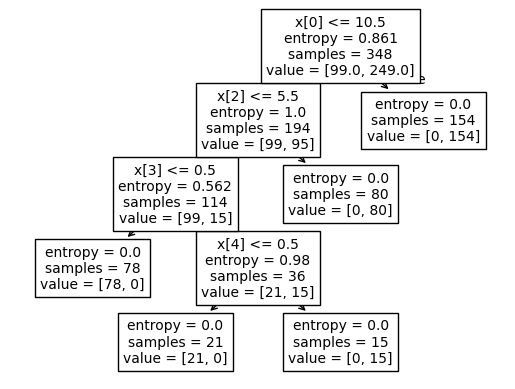

In [11]:
plt.show(tree.plot_tree(model))

In [9]:
print(metrics.classification_report(y_teste, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00       173

    accuracy                           1.00       232
   macro avg       1.00      1.00      1.00       232
weighted avg       1.00      1.00      1.00       232



In [14]:
print(metrics.confusion_matrix(y_teste, y_pred))

[[ 59   0]
 [  0 173]]


In [17]:
usuario = input('Digite os novos dados: ')

dados = [
    {'texto':'Este é um texto malicioso', 'rotulo':'malicioso'},
    {'texto':'Este é um texto legal', 'rotulo':'não malicioso'},
    {'texto':'texto', 'rotulo':None}
]

# Separar em x(texto) e Y (rótulo)
y = [i["texto"] for i in dados]
x = [i["rotulo"] for i in dados[:-1]]

# Pré-processamento
def analisa_texto(usuario):
  # Simulação de detecção de palavras-chave maliciosas
  palavras_chave = ['malicioso', 'ataque', 'perigoso']
  return 'malicioso' if any(palavra in usuario.lower() for palavra in palavras_chave) else 'não malicioso'

# Processar o texto do usuário
resultado= analisa_texto(usuario)

print(resultado)

Digite os novos dados: 9
não malicioso
